In [1]:
import pandas as pd
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
drops = gpd.read_parquet('data/realFakeDrops.parquet')
drops.sample()

,dropID,vendor,tail_number,inc_name,inc_num,viirs_fireid,mtbs_eventID,false_pos,split_drop,IA_drop,AC_type,fluid,nonfire,knots,heading_true,alt_feet,gallons,geometry,latitude,longitude,line_length_mile,shape_length,drop_minute,drop_second,UTC_date_time,local_date,local_year,local_month,local_day,local_tz,local_hour,burn_severity,gm_pdsi,gm_srad,gm_vpd,aw_mat,aw_mcmt,aw_mwmt,aw_td,dem,dem_slope,dem_aspect,dem_flow_acc,landfire_fvt,landfire_fbfm40,biomass_afg,biomass_pfg,ndvi,dm_tmax,dm_tmin,hillshade,prev_area,gallon_sum,prev_perimID,fut_perimID,ros_before,ros_after,ros_change,efficacy_mean,real_drop
23,T-03_2018_200_22:42:17,latitude,T-03,TAYLOR CREEK,2018-ORMED-000395,F9132,OR4252812357120180715,NO,NO,NO,LAT,,,136.0,354.0,3526.0,2502.0,"MULTILINESTRING ((-2220011.598 2491110.176, -2...",42.50037,-123.56513,0.261329,420.569253,42,17,2018-07-19 22:42:17,43300.0,2018.0,7.0,19.0,America/Los_Angeles,15.0,3.45,0.446999,348.985016,2.2195,11.800001,5.0,20.899998,15.799998,920.799988,21.904751,196.500732,3.5,2048.899902,149.949997,230.0,670.0,0.7059,8.569776,8.150904,200.35,2.624374e+06,10984.0,F9132_3,F9132_4,0.0,8.333333,8.333333,persistant,True


In [3]:
realDrops = drops.loc[drops.real_drop]
fakeDrops = drops.loc[~drops.real_drop]

In [4]:
slowed = realDrops.loc[drops.ros_change <= realDrops.ros_change.mean()]
persistant = realDrops.loc[drops.ros_change > realDrops.ros_change.mean()]

In [5]:
columns = [
    'line_length_mile','gm_pdsi', 'gm_srad', 'gm_vpd', 'aw_mat',
   'aw_mcmt', 'aw_mwmt', 'aw_td', 'dem', 'dem_slope', 'dem_aspect',
   'dem_flow_acc', 'landfire_fvt', 'landfire_fbfm40', 'biomass_afg',
   'biomass_pfg', 'ndvi', 'dm_tmax', 'dm_tmin', 'hillshade', 'prev_area',
   'gallon_sum', 'ros_before', 'ros_after'
]
len(columns)

24

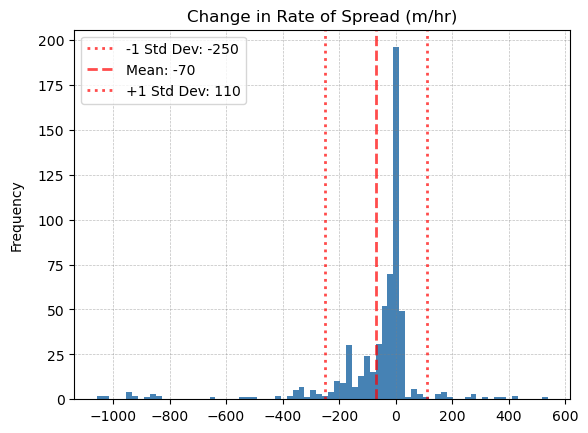

In [6]:
mean_ros = -70
std_ros = 180

realDrops.ros_change.hist(bins='fd', color='steelblue')

plt.axvline(mean_ros-std_ros, color='r', alpha=0.7, linestyle='dotted', linewidth=2, label=f'-1 Std Dev: -250')
plt.axvline(mean_ros, color='r', alpha=0.7, linestyle='dashed', linewidth=2, label=f'Mean: -70')
plt.axvline(mean_ros+std_ros, color='r', alpha=0.7, linestyle='dotted', linewidth=2, label=f'+1 Std Dev: 110')

# Labels and legend
plt.title("Change in Rate of Spread (m/hr)")
plt.ylabel("Frequency",labelpad=10)
#plt.title("Histogram of Change in ROS")
#plt.xlim(-300,200)

plt.grid(color='gray', linestyle='dashed', linewidth=0.5, alpha=0.5) 
plt.legend()#loc='upper right', bbox_to_anchor=(1.4, 1.0))
plt.savefig("images/ros_change_hist.png", dpi=300, bbox_inches="tight")

plt.show()

line_length_mile,gm_pdsi,gm_srad,gm_vpd,aw_mat,aw_mcmt,aw_mwmt,aw_td,dem,dem_slope,dem_aspect,dem_flow_acc,landfire_fvt,landfire_fbfm40,biomass_afg,biomass_pfg,ndvi,dm_tmax,dm_tmin,hillshade,prev_area,gallon_sum,ros_before,ros_after,

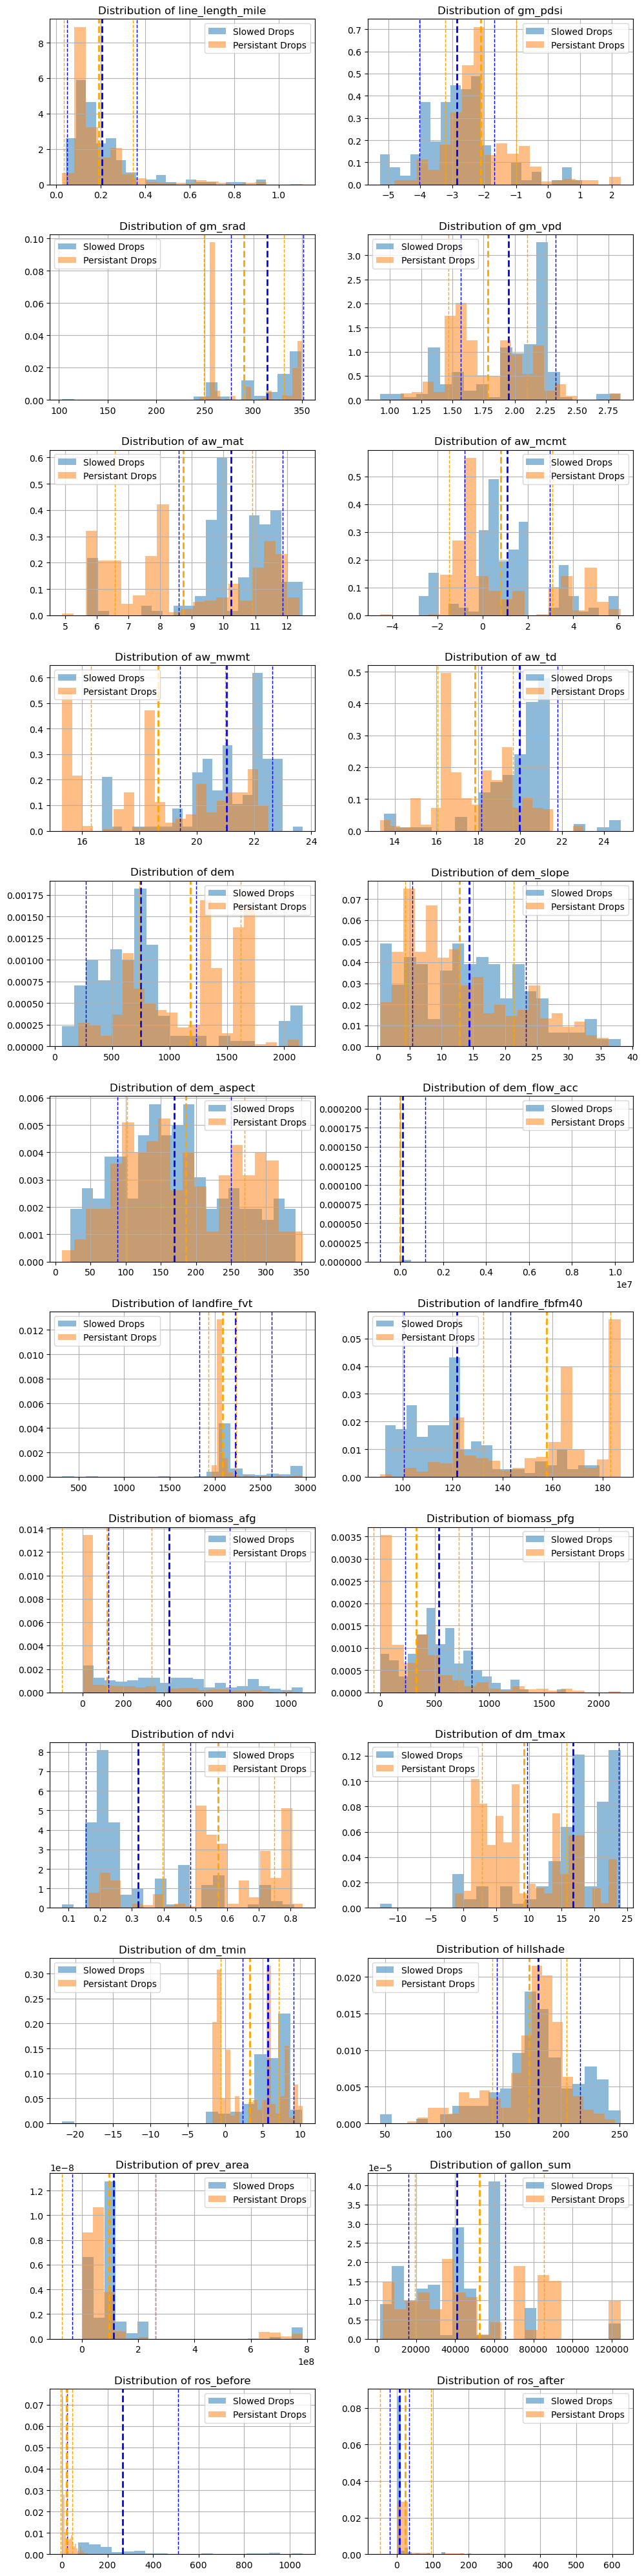

In [7]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(10, 40))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    print(col, end=',')
    
    # Plot histograms
    slowed[col].hist(bins=20, ax=ax, alpha=0.5, label='Slowed Drops',density=True)
    persistant[col].hist(bins=20, ax=ax, alpha=0.5, label='Persistant Drops',density=True)
    
    # Compute statistics
    mean_real = slowed[col].mean()
    std_real = slowed[col].std()
    mean_fake = persistant[col].mean()
    std_fake = persistant[col].std()
    
    # Add vertical lines for mean and std deviation
    ax.axvline(mean_real, color='blue', linestyle='dashed', linewidth=2)#, label='Real Mean')
    ax.axvline(mean_real - std_real, color='blue', linestyle='dashed', linewidth=1)#, label='Real ±1 STD')
    ax.axvline(mean_real + std_real, color='blue', linestyle='dashed', linewidth=1)
    
    ax.axvline(mean_fake, color='orange', linestyle='dashed', linewidth=2)#, label='Fake Mean')
    ax.axvline(mean_fake - std_fake, color='orange', linestyle='dashed', linewidth=1)#, label='Fake ±1 STD')
    ax.axvline(mean_fake + std_fake, color='orange', linestyle='dashed', linewidth=1)
    
    # labels
    ax.set_title(f'Distribution of {col}')
    ax.legend()

plt.tight_layout()
plt.show()


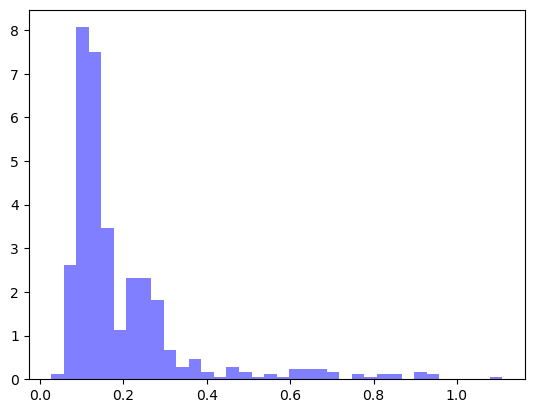

In [8]:
col = 'line_length_mile'

# Get bins
counts,bins,patches = plt.hist(realDrops[col], bins='auto', alpha=0.5, label='Slowed Drops', color='blue',density=True)

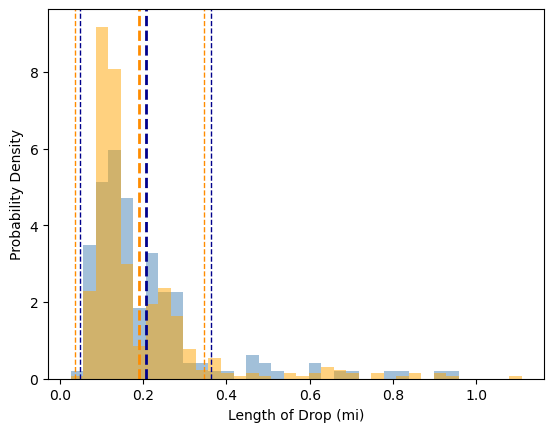

In [9]:
# Plot histograms
plt.figure()

plt.hist(slowed[col], bins=bins, alpha=0.5, label='Slowed Drops', color='steelblue',density=True)
plt.hist(persistant[col], bins=bins, alpha=0.5, label='Persistent Drops', color='orange',density=True)

# Compute statistics
mean_real = slowed[col].mean()
std_real = slowed[col].std()
mean_fake = persistant[col].mean()
std_fake = persistant[col].std()

# Add vertical lines for mean and std deviation
plt.axvline(mean_real, color='darkblue', linestyle='dashed', linewidth=2)
plt.axvline(mean_real - std_real, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(mean_real + std_real, color='darkblue', linestyle='dashed', linewidth=1)

plt.axvline(mean_fake, color='darkorange', linestyle='dashed', linewidth=2)
plt.axvline(mean_fake - std_fake, color='darkorange', linestyle='dashed', linewidth=1)
plt.axvline(mean_fake + std_fake, color='darkorange', linestyle='dashed', linewidth=1)

# Labels
plt.xlabel('Length of Drop (mi)')
plt.ylabel('Probability Density')

# Save
plt.savefig("images/length_diff_hist_dens.png", dpi=300, bbox_inches="tight")

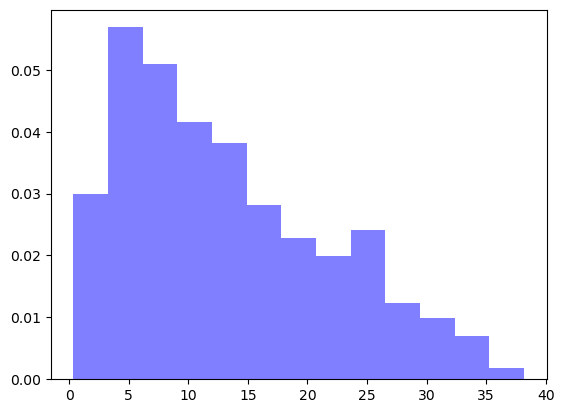

In [10]:
col = 'dem_slope'

# Get bins
counts,bins,patches = plt.hist(realDrops[col], bins='auto', alpha=0.5, label='Slowed Drops', color='blue',density=True)

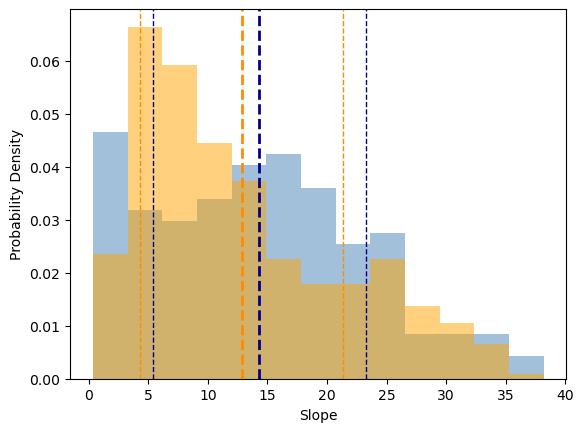

In [11]:
# Plot histograms
plt.figure()

plt.hist(slowed[col], bins=bins, alpha=0.5, label='Slowed Drops', color='steelblue',density=True)
plt.hist(persistant[col], bins=bins, alpha=0.5, label='Persistent Drops', color='orange',density=True)

# Compute statistics
mean_real = slowed[col].mean()
std_real = slowed[col].std()
mean_fake = persistant[col].mean()
std_fake = persistant[col].std()

# Add vertical lines for mean and std deviation
plt.axvline(mean_real, color='darkblue', linestyle='dashed', linewidth=2)
plt.axvline(mean_real - std_real, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(mean_real + std_real, color='darkblue', linestyle='dashed', linewidth=1)

plt.axvline(mean_fake, color='darkorange', linestyle='dashed', linewidth=2)
plt.axvline(mean_fake - std_fake, color='darkorange', linestyle='dashed', linewidth=1)
plt.axvline(mean_fake + std_fake, color='darkorange', linestyle='dashed', linewidth=1)

# Labels
plt.xlabel('Slope')
plt.ylabel('Probability Density')


# Save
plt.savefig("images/slope_diff_hist_dens.png", dpi=300, bbox_inches="tight")

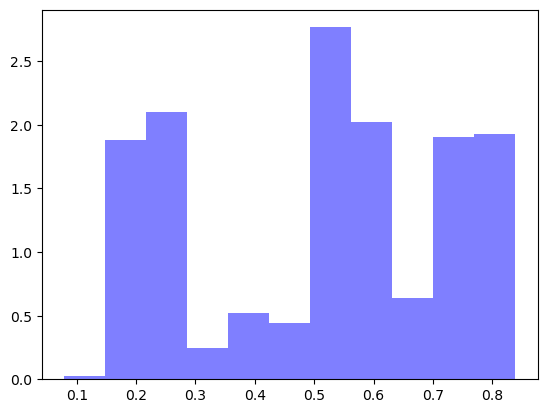

In [12]:
col = 'ndvi'

# Get bins
counts,bins,patches = plt.hist(realDrops[col], bins='auto', alpha=0.5, label='Slowed Drops', color='blue',density=True)

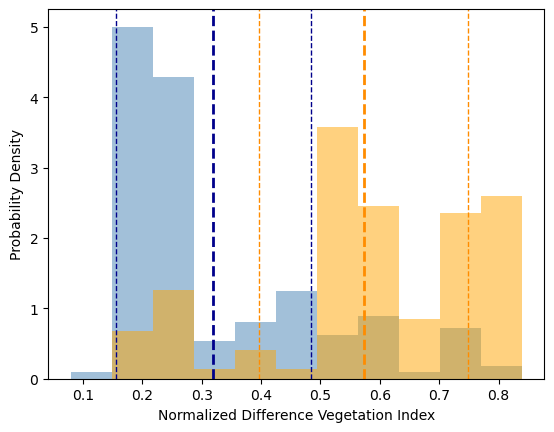

In [13]:
# Plot histograms
plt.figure()

plt.hist(slowed[col], bins=bins, alpha=0.5, label='Slowed Drops', color='steelblue',density=True)
plt.hist(persistant[col], bins=bins, alpha=0.5, label='Persistent Drops', color='orange',density=True)

# Compute statistics
mean_real = slowed[col].mean()
std_real = slowed[col].std()
mean_fake = persistant[col].mean()
std_fake = persistant[col].std()

# Add vertical lines for mean and std deviation
plt.axvline(mean_real, color='darkblue', linestyle='dashed', linewidth=2)
plt.axvline(mean_real - std_real, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(mean_real + std_real, color='darkblue', linestyle='dashed', linewidth=1)

plt.axvline(mean_fake, color='darkorange', linestyle='dashed', linewidth=2)
plt.axvline(mean_fake - std_fake, color='darkorange', linestyle='dashed', linewidth=1)
plt.axvline(mean_fake + std_fake, color='darkorange', linestyle='dashed', linewidth=1)

# Labels
plt.xlabel('Normalized Difference Vegetation Index')
plt.ylabel('Probability Density')


# Save
plt.savefig("images/ndvi_diff_hist_dens.png", dpi=300, bbox_inches="tight")

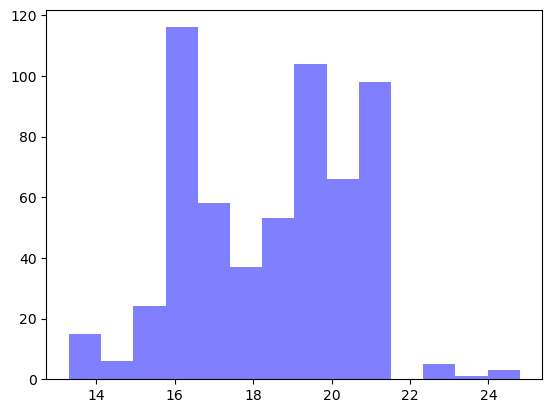

In [14]:
col = 'aw_td'

#Get bins
counts,bins,patches = plt.hist(realDrops[col], bins='auto', alpha=0.5, label='Slowed Drops', color='blue')

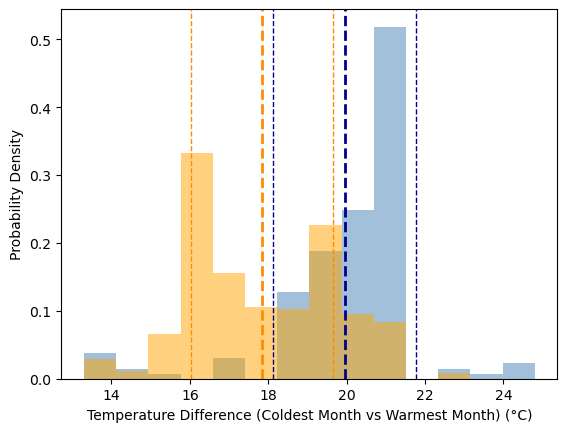

In [15]:
# Plot histograms
plt.hist(slowed[col], bins=bins, alpha=0.5, label='Slowed Drops', color='steelblue',density=True)
plt.hist(persistant[col], bins=bins, alpha=0.5, label='Persistent Drops', color='orange',density=True)

# Compute statistics
mean_real = slowed[col].mean()
std_real = slowed[col].std()
mean_fake = persistant[col].mean()
std_fake = persistant[col].std()

# Add vertical lines for mean and std deviation
plt.axvline(mean_real, color='darkblue', linestyle='dashed', linewidth=2)
plt.axvline(mean_real - std_real, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(mean_real + std_real, color='darkblue', linestyle='dashed', linewidth=1)

plt.axvline(mean_fake, color='darkorange', linestyle='dashed', linewidth=2)
plt.axvline(mean_fake - std_fake, color='darkorange', linestyle='dashed', linewidth=1)
plt.axvline(mean_fake + std_fake, color='darkorange', linestyle='dashed', linewidth=1)

# Labels
plt.xlabel('Temperature Difference (Coldest Month vs Warmest Month) (°C)')
plt.ylabel('Probability Density')

# Save
plt.savefig("images/temp_diff_hist_dens.png", dpi=300, bbox_inches="tight")

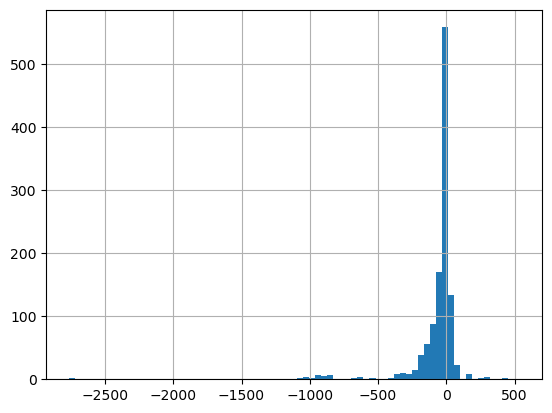

In [16]:
col = 'ros_change'

#Get bins
fig, ax = plt.subplots()
n_bins = 75
hist = drops[col].hist(bins=n_bins, ax=ax, alpha=0.99)
patches = hist.patches
bins = [patch.get_x() + patch.get_width() for patch in patches]
bins = [drops[col].min()] + bins

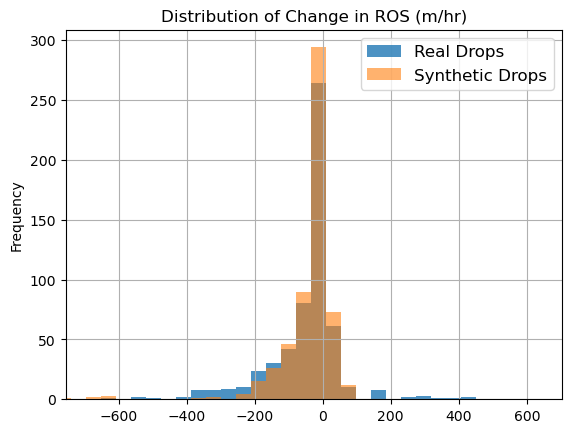

In [17]:
fig, ax = plt.subplots()

realDrops[col].hist(bins=bins, ax=ax, alpha=0.8, label='Real Drops')#, density=True)
fakeDrops[col].hist(bins=bins, ax=ax, alpha=0.6, label='Synthetic Drops')#, density=True)

# Compute statistics
mean_real = realDrops[col].mean()
std_real = realDrops[col].std()
mean_fake = fakeDrops[col].mean()
std_fake = fakeDrops[col].std()

# Labels
ax.set_title(f'Distribution of Change in ROS (m/hr)')
ax.set_ylabel('Frequency')
ax.legend(fontsize='large')
ax.set_xlim(left=-755)

# Save
plt.savefig('images/real_vs_fake_ros_change.png', bbox_inches='tight', dpi=300)